# Homework 4: Data Visualization
- **Name**: DHIRAJ SANJAY LANDGE
- **UB Username**: dhirajsa
- **UB Person Number**:  50479342

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

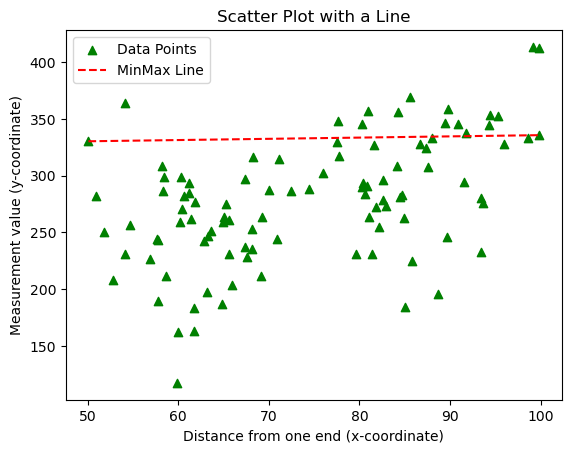

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataA = pd.read_csv('scatter_data.csv')

plt.scatter(dataA['% x'], dataA[' y '], color='green', marker='^', label='Data Points')

sorted_dataA = dataA.sort_values(by='% x')
plt.plot([sorted_dataA['% x'].iloc[0], sorted_dataA['% x'].iloc[-1]],
         [sorted_dataA[' y '].iloc[0], sorted_dataA[' y '].iloc[-1]],
         color='red', linestyle='--', label='MinMax Line')

plt.title('Scatter Plot with a Line')

plt.xlabel('Distance from one end (x-coordinate)')
plt.ylabel('Measurement value (y-coordinate)')

plt.legend()
plt.show()

### Problem 2 - Histogram

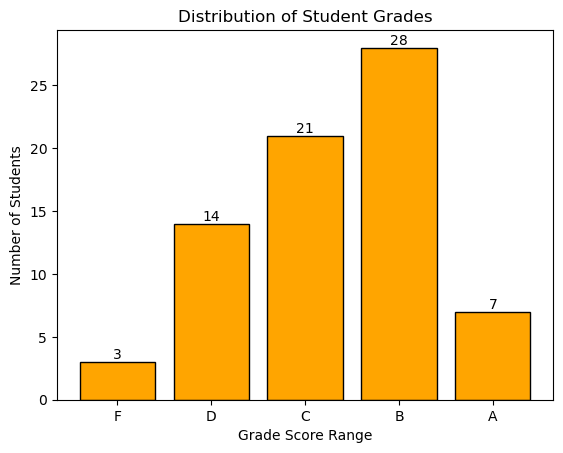

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
dataB = pd.read_csv('student_grades.csv')
dataB
dataB.columns = dataB.columns.str.strip()
score = [(0, 60), (60, 70), (70, 80), (80, 90), (90, 100)] 
label = ['F', 'D', 'C', 'B', 'A']
dataB['grade_category'] = pd.cut(dataB['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = dataB['grade_category'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.xlabel('Grade Score Range')
plt.ylabel('Number of Students')
plt.title('Distribution of Student Grades')

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

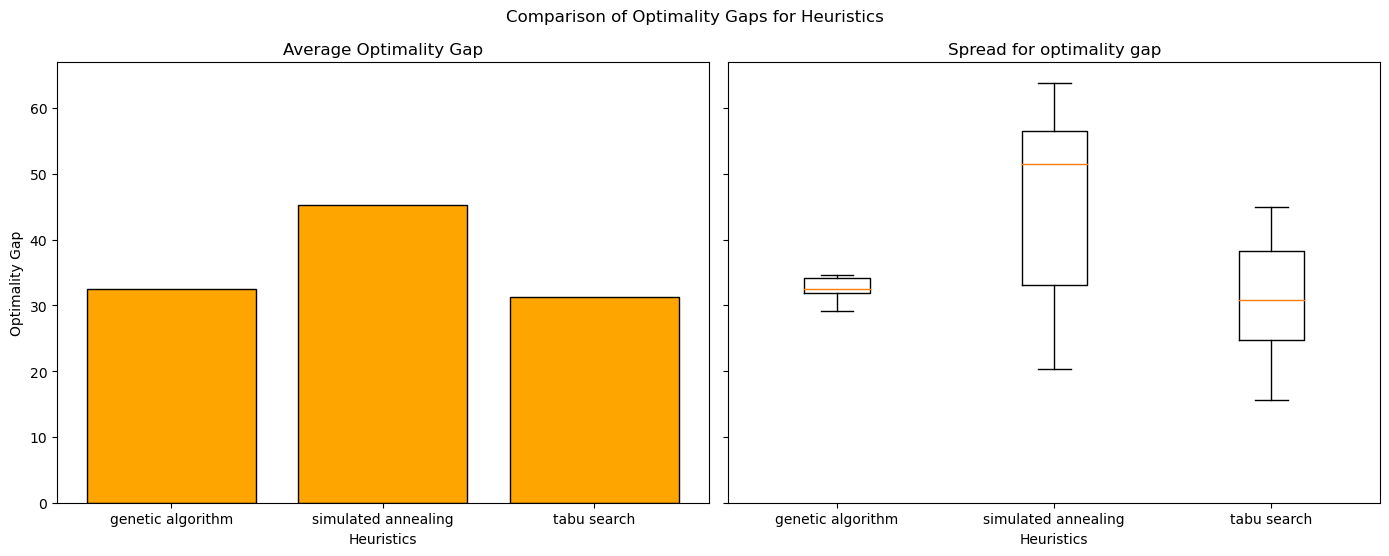

In [3]:
dataC = pd.read_csv("solution_data.csv")
dataC.columns = dataC.columns.str.strip()
optimal = dataC[dataC["SolnMethod"] == "optimal"]
mergedata = dataC.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
mergedata['optimality_gap'] = ((mergedata['Valueoptimal'] - mergedata['Value'])/mergedata['Valueoptimal'])*100
heuristic = mergedata[mergedata['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

--- 
## Part 2 - Explore New Plot Types

The code is designed to create a line plot that will depict the trend of the INR to USD exchange rate over a period of time. The plot will visualize data from a CSV file, which contains historical dates and corresponding closing exchange rates, to show how the value of the Indian rupee has fluctuated against the US dollar. A line plot is an excellent choice for this data type because it clearly illustrates trends and changes over time, allowing the reader to discern patterns in the currency exchange rate's movement with ease.

- **URL of Example Code**:  https://www.kaggle.com/datasets/bhanupratapbiswas/usd-inr-conversion-rate-case-study
- **URL of Sample Data**: https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py

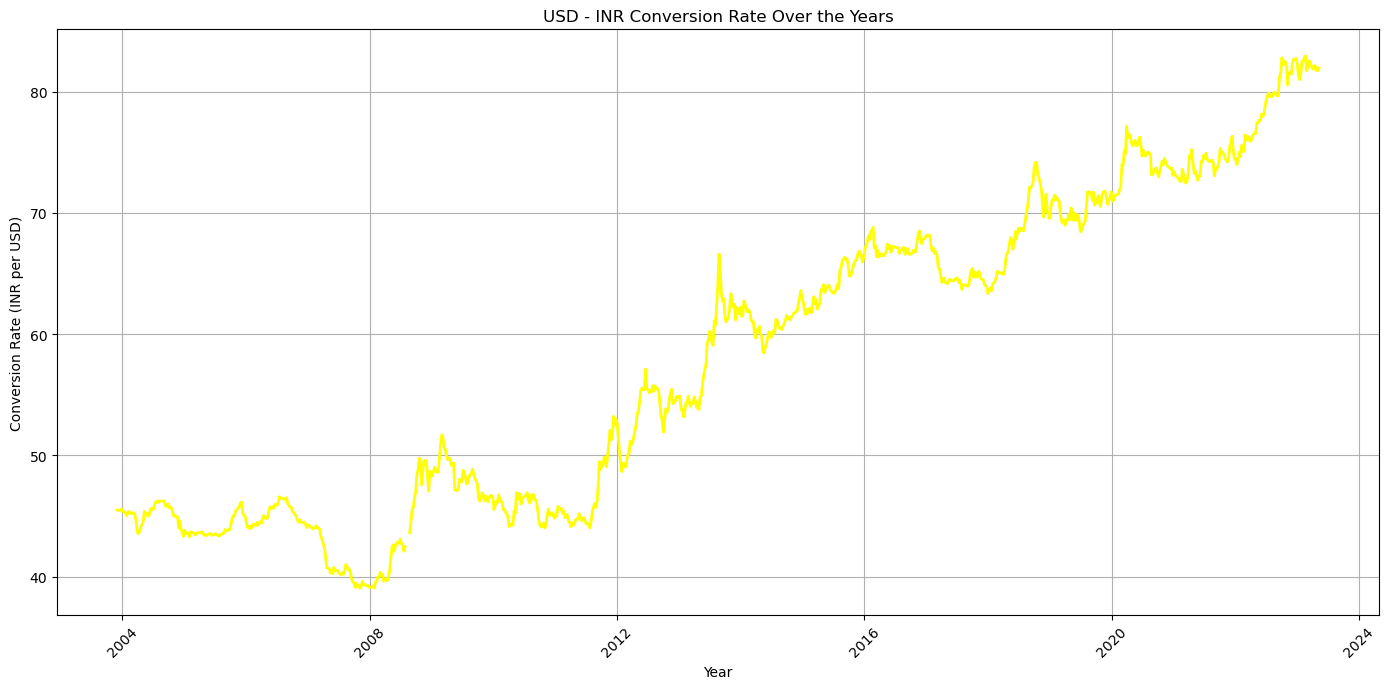

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dataD = pd.read_csv("INR-USD.csv")


dataD['Date'] = pd.to_datetime(dataD['Date'])

plt.figure(figsize=(14, 7))
plt.plot(dataD['Date'], dataD['Close'], color='yellow', linewidth=2)
plt.title('USD - INR Conversion Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Conversion Rate (INR per USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

The code includes commands for loading the data, parsing dates, setting the plot size, drawing the line plot, and labeling the plot elements for clarity. Users can customize this plot by altering the line color and width, adjusting the size of the plot, rotating the axis labels for better legibility, adding markers to data points, or plotting additional data series to compare different datasets. These customizations allow for flexibility in presentation and can enhance the interpretability of the data visualized.